# Hypothyroidism Analysis

## Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients

## Success Metric

 * To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## Table of Contents

- [Loading Libraries](#Loading_Libraries)
- [Loading the data](#Loading_the_data)
- [Data Cleaning](#Data_cleaning)
- [Univariate analysis](#Univariate_analysis)
- [Bivariate analysis](#Bivariate_analysis)
- [Part 1: Decision Trees](#decision_trees)
- [Part 2: SVM](#svm)

## Loading Libraries
<a id="Loading_Libraries" Loading Libraries></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## **Loading the data**
 <a id="Loading_the_data" Loading the data ></a>

In [2]:
df = pd.read_csv('C:\\Users\\LENOVO\\Downloads\\hypothyroid.csv')

In [3]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


## **Data Cleaning**
 <a id = "Data_cleaning" Data Cleanin ></a>

### Null values

In [4]:
df.isnull().values.any()

False

### Duplicates

In [5]:
df.duplicated().any()

True

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

### Entry conversions

In [8]:
df['sex'] = df['sex'].map({'M' : 0,
                          'F' : 1, '?' : 2})

df['on_thyroxine'] = df['on_thyroxine'].map({'f': 0,
                                            't' : 1}).fillna(df['on_thyroxine'])

df['query_on_thyroxine'] = df['query_on_thyroxine'].map({'f': 0,
                                            't' : 1}).fillna(df['query_on_thyroxine'])

df['on_antithyroid_medication'] = df['on_antithyroid_medication'].map({'f': 0,
                                            't' : 1}).fillna(df['on_antithyroid_medication'])

df['thyroid_surgery'] = df['thyroid_surgery'].map({'f': 0,
                                            't' : 1}).fillna(df['thyroid_surgery'])

df['query_hypothyroid'] = df['query_hypothyroid'].map({'f': 0,
                                            't' : 1}).fillna(df['query_hypothyroid'])

df['query_hyperthyroid'] = df['query_hyperthyroid'].map({'f': 0,
                                            't' : 1}).fillna(df['query_hyperthyroid'])

df['pregnant'] = df['pregnant'].map({'f': 0,
                                            't' : 1}).fillna(df['pregnant'])

df['sick'] = df['sick'].map({'f': 0,
                                            't' : 1}).fillna(df['sick'])

df['tumor'] = df['tumor'].map({'f': 0,
                                            't' : 1}).fillna(df['tumor'])

df['lithium'] = df['lithium'].map({'f': 0,
                                            't' : 1}).fillna(df['lithium'])

df['goitre'] = df['goitre'].map({'f' : 0, 't' : 1}).fillna(df['goitre'])

df['TSH_measured'] = df['TSH_measured'].map({'y' : 1,
                                            'n' : 0}).fillna(df['TSH_measured'])

# The question mark values are addressed by filling them with zeros
df['TSH'] = df['TSH'].map({'?' : 0}).fillna(df['TSH']).astype(float)

df['T3_measured'] = df['T3_measured'].map({'y' : 1,
                                          'n' : 0}).fillna(df['T3_measured'])

df['T3'] = df['T3'].map({'?' : 0}).fillna(df['T3']).astype(float)

df['TT4_measured'] = df['TT4_measured'].map({'y' : 1,
                                            'n' : 0}).fillna(df['TT4_measured'])

df['TT4'] = df['TT4'].map({'?': 0}).fillna(df['TT4']).astype(float)

df['T4U_measured'] = df['T4U_measured'].map({'y' : 1, 'n' : 0}).fillna(df['T4U_measured'])

df['T4U'] = df['T4U'].map({'?' : 0}).fillna(df['T4U']).astype(float)

df['FTI_measured'] = df['FTI_measured'].map({'y' : 1, 'n' : 0}).fillna(df['FTI_measured'])

df['FTI'] = df['FTI'].map({'?' : 0}).fillna(df['FTI']).astype(float)

df['TBG_measured'] = df['TBG_measured'].map({'y' : 1, 'n' : 0}).fillna(df['TBG_measured'])
df['TBG'] = df['TBG'].map({'?' : 0}).fillna(df['TBG']).astype(float)

df['status'] = df['status'].map({'hypothyroid' : 1, 'negative' : 0}).fillna(df['status'])
df['age'] = df['age'].map({'?' : 0}). fillna(df['age']).astype(int)

In [9]:
df['age'] = df['age'].map({0 : df['age'].mean()}).fillna(df['age']).astype(int)

### Data cleaning documentation

- Dropped duplicates.
- For sex, Male = 0, Female = 1, ? = 2(labeled as Unknown in charts)
- For any Boolean column, True = 1, False = 0
- For status, Negative = 0, Hypothyroid = 1
- For any '?' entry in numerical columns, replace it with 0.
- For age, any '?' is first replaced with 0, then the column is converted to integers and the 0s are replaced with age.mean()

In [10]:
df.sample(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
163,0,51,1,0,0,0,0,0,0,0,...,1,2.1,1,93.0,1,0.87,1,106.0,0,0.0
3131,0,16,1,0,0,0,0,0,0,0,...,1,3.2,1,178.0,1,0.94,1,189.0,0,0.0
3005,0,51,1,0,0,0,0,0,0,0,...,1,1.2,1,60.0,1,0.89,1,67.0,0,0.0
1825,0,54,1,1,0,0,0,0,0,0,...,0,0.0,1,134.0,1,1.24,1,108.0,0,0.0
933,0,59,1,0,0,0,0,0,1,0,...,0,0.0,0,0.0,0,0.00,0,0.0,1,22.0
2253,0,43,0,0,0,1,0,0,1,0,...,1,2.6,1,95.0,1,0.90,1,106.0,0,0.0
1965,0,58,0,0,0,0,0,0,0,0,...,1,2.5,1,144.0,1,0.84,1,172.0,0,0.0
2736,0,37,1,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0.00,0,0.0,1,20.0
475,0,65,1,1,0,0,0,0,0,0,...,1,2.4,1,132.0,1,1.15,1,115.0,0,0.0
1091,0,43,1,0,0,0,0,0,0,0,...,1,1.9,1,91.0,1,0.82,1,111.0,0,0.0


### Info of the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   int64  
 1   age                        3086 non-null   int32  
 2   sex                        3086 non-null   int64  
 3   on_thyroxine               3086 non-null   int64  
 4   query_on_thyroxine         3086 non-null   int64  
 5   on_antithyroid_medication  3086 non-null   int64  
 6   thyroid_surgery            3086 non-null   int64  
 7   query_hypothyroid          3086 non-null   int64  
 8   query_hyperthyroid         3086 non-null   int64  
 9   pregnant                   3086 non-null   int64  
 10  sick                       3086 non-null   int64  
 11  tumor                      3086 non-null   int64  
 12  lithium                    3086 non-null   int64  
 13  goitre                     3086 non-null   int64

In [12]:
df.shape

(3086, 26)

## **Univariate Analysis**
<a id="Univariate_analysis" Univariate analysis ></a>

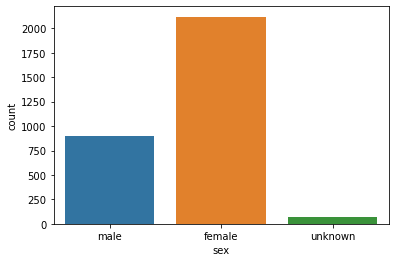

In [13]:
sns.countplot(x='sex', data=df)
plt.xticks(ticks=[0, 1, 2], labels=['male', 'female', 'unknown'])
plt.show()

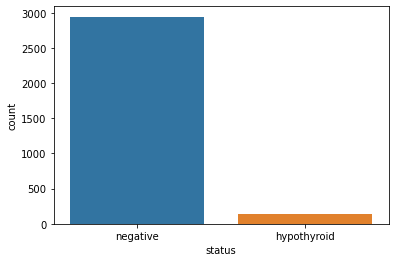

In [14]:
sns.countplot(x='status', data=df)
plt.xticks(ticks=[0, 1], labels=['negative', 'hypothyroid'])
plt.show()

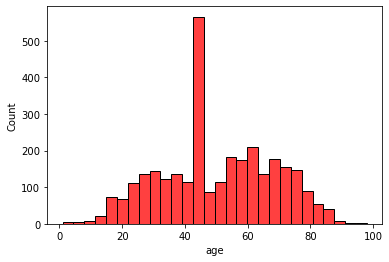

In [15]:
sns.histplot(x='age', data=df, color='red', palette='pastel')
plt.show()

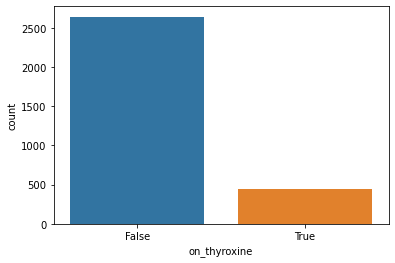

In [16]:
sns.countplot(x='on_thyroxine', data=df)
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

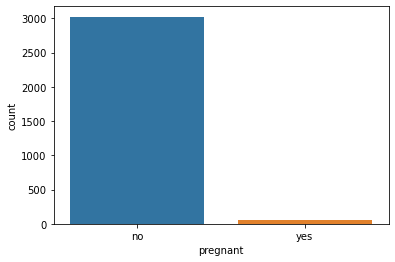

In [17]:
sns.countplot(x='pregnant', data=df)
plt.xticks(ticks=[0,1], labels=['no', 'yes'])
plt.show()

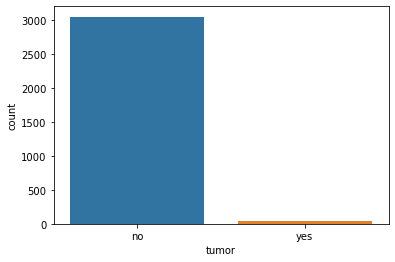

In [18]:
sns.countplot(x='tumor', data=df)
plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
plt.show()

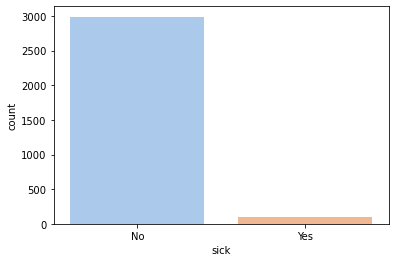

In [19]:
sns.countplot(x='sick', data=df, palette='pastel')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

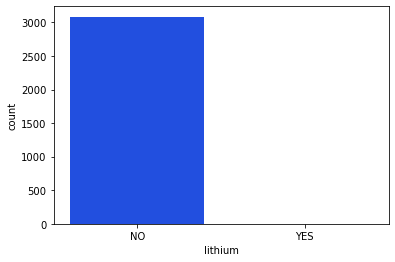

In [20]:
sns.countplot(x='lithium', data=df, palette='bright')
plt.xticks(ticks=[0,1], labels=['NO', 'YES'])
plt.show()

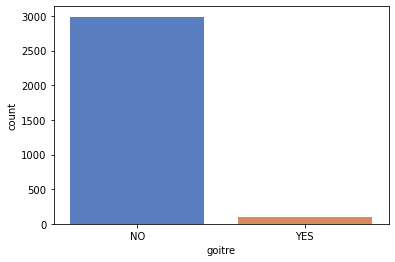

In [21]:
sns.countplot(x='goitre', data=df, palette='muted')
plt.xticks(ticks=[0,1], labels=['NO', 'YES'])
plt.show()

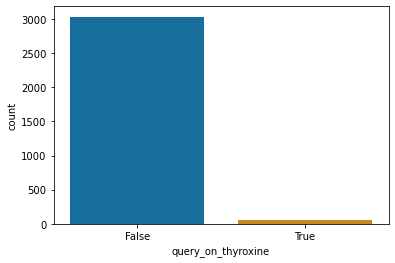

In [22]:
sns.countplot(x='query_on_thyroxine', data=df, palette='colorblind')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

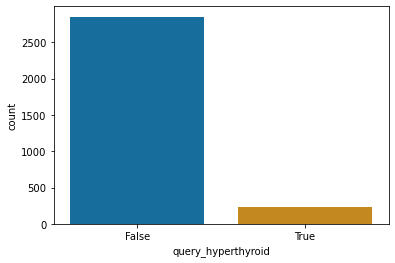

In [23]:
sns.countplot(x='query_hyperthyroid', data=df, palette='colorblind')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

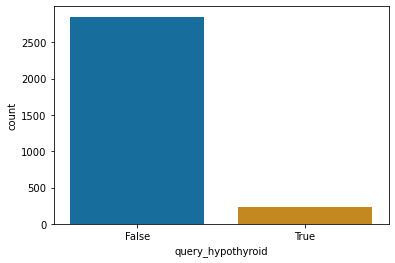

In [24]:
sns.countplot(x='query_hypothyroid', data=df, palette='colorblind')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

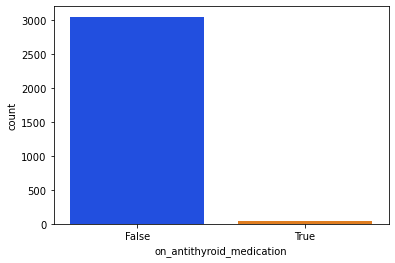

In [25]:
sns.countplot(x='on_antithyroid_medication', data=df, palette='bright')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

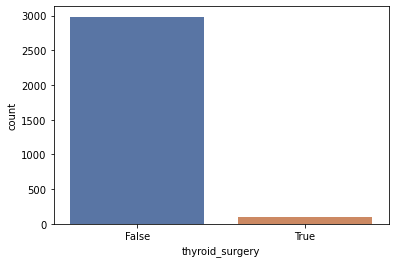

In [26]:
sns.countplot(x='thyroid_surgery', data=df, palette='deep')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

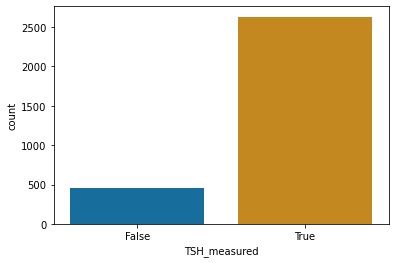

In [27]:
sns.countplot(x='TSH_measured', data=df, palette='colorblind')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


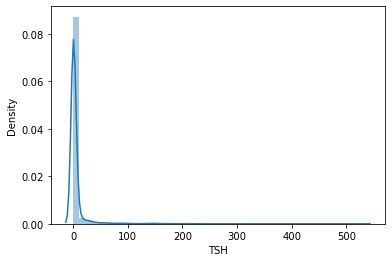

In [28]:
sns.distplot(a=df['TSH'])

plt.show()

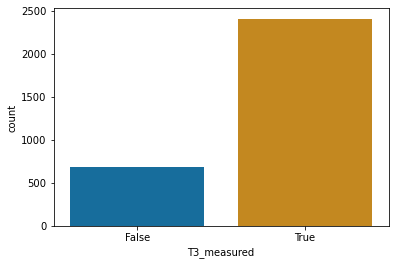

In [29]:
sns.countplot(x='T3_measured', data=df, palette='colorblind')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


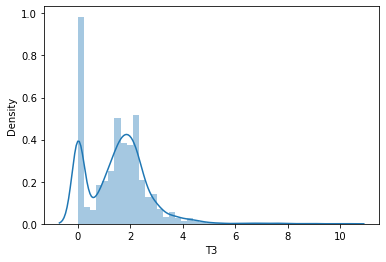

In [30]:
sns.distplot(a=df['T3'])
plt.show()

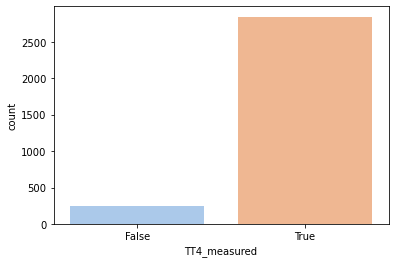

In [31]:
sns.countplot(x='TT4_measured', data=df, palette='pastel')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

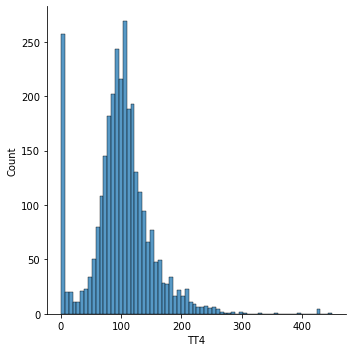

In [32]:
sns.displot(x='TT4', data=df)
plt.show()

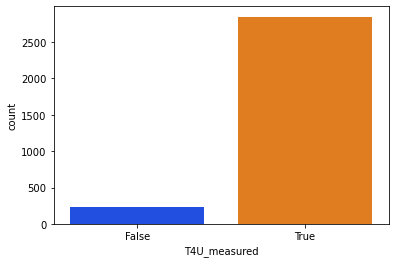

In [33]:
sns.countplot(x='T4U_measured', data=df, palette='bright')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

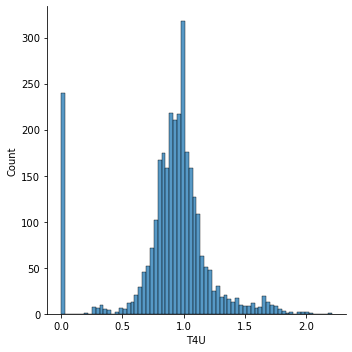

In [34]:
sns.displot(x='T4U', data=df)
plt.show()

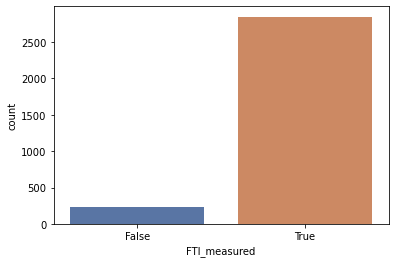

In [35]:
sns.countplot(x='FTI_measured', data=df, palette='deep')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

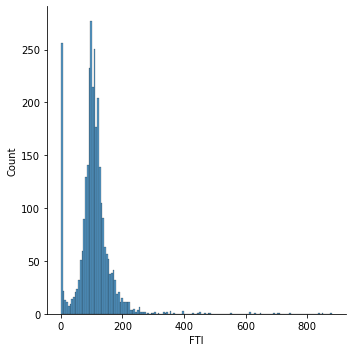

In [36]:
sns.displot(x='FTI', data=df)
plt.show()

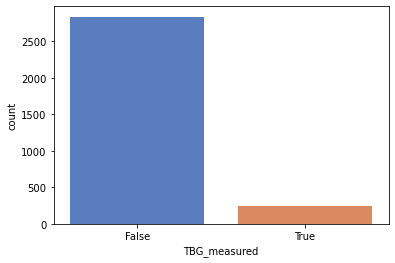

In [37]:
sns.countplot(x='TBG_measured', data=df, palette='muted')
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.show()

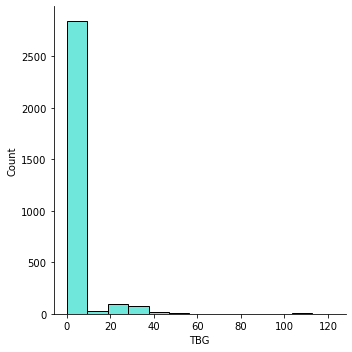

In [38]:
sns.displot(x='TBG', data=df, color='turquoise')
plt.show()

### Measures of central tendencyand dispersion

In [39]:
numbers = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in numbers:
    print(f"Measures of central tendency and dispersion for {col}: ")
    print("Mean: ", df[col].mean())
    print("Median: ", df[col].median())
    print("Mode: ", df[col].mode())
    print("Standard deviation: ", df[col].std())
    print("****************************")
    print("Kurtosis: ", df[col].kurt())
    print("Skewness: ", df[col].skew())
    print("=========================================================")

Measures of central tendency and dispersion for age: 
Mean:  49.96111471160078
Median:  48.0
Mode:  0    43
dtype: int32
Standard deviation:  18.07756862645562
****************************
Kurtosis:  -0.7549867324805302
Skewness:  0.002047903555813102
Measures of central tendency and dispersion for TSH: 
Mean:  4.952793259883344
Median:  0.4
Mode:  0    0.0
dtype: float64
Standard deviation:  22.276446817821206
****************************
Kurtosis:  179.28817042658284
Skewness:  11.115661996068875
Measures of central tendency and dispersion for T3: 
Mean:  1.5075826312378469
Median:  1.6
Mode:  0    0.0
dtype: float64
Standard deviation:  1.179189838963223
****************************
Kurtosis:  4.600644022144946
Skewness:  1.1273329291390457
Measures of central tendency and dispersion for TT4: 
Mean:  100.25272197018795
Median:  100.0
Mode:  0    0.0
dtype: float64
Standard deviation:  51.7957002531258
****************************
Kurtosis:  3.76395648227627
Skewness:  0.639240201228

## Bivariate Analysis
 <a id="Bivariate_analysis" Bivariate analysis ></a>

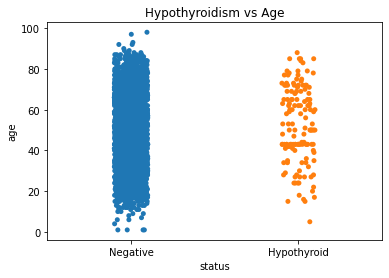

In [40]:
# Age vs hypothyrodism
sns.stripplot(x='status', y='age', data=df)
plt.xticks(ticks=[0,1], labels=['Negative', 'Hypothyroid'])
plt.title('Hypothyroidism vs Age')
plt.show()

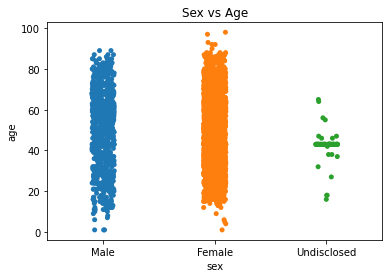

In [41]:
# Gender vs Hypothyroidism
sns.stripplot(x='sex', y='age', data=df)
plt.xticks(ticks=[0,1, 2], labels=['Male', 'Female', 'Undisclosed'])
plt.title('Sex vs Age')
plt.show()

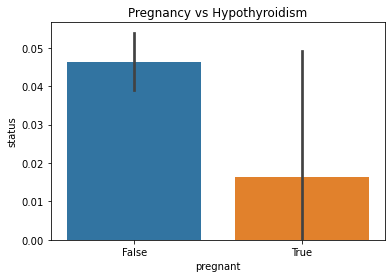

In [42]:
# Pregnancy vs Hypothyroidism
sns.barplot(x='pregnant', y='status', data=df)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.title('Pregnancy vs Hypothyroidism')
plt.show()

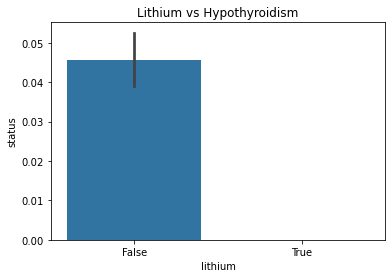

In [43]:
# Lithium vs Hypothyroidism
sns.barplot(x='lithium', y='status', data=df)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.title('Lithium vs Hypothyroidism')
plt.show()

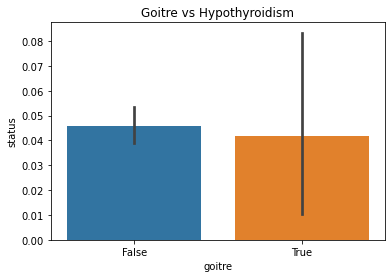

In [44]:
# Goitre vs Hypothyroidism
sns.barplot(x='goitre', y='status', data=df)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.title('Goitre vs Hypothyroidism')
plt.show()

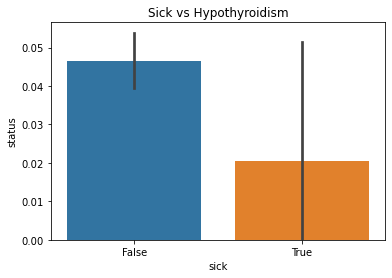

In [45]:
# Sickness vs Hypothyroidism
sns.barplot(x='sick', y='status', data=df)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.title('Sick vs Hypothyroidism')
plt.show()

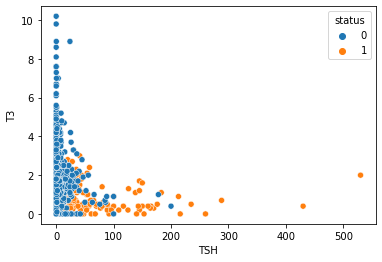

In [46]:
# T3 vs TSH levels in patients
sns.scatterplot(x='TSH', y='T3', hue='status', data=df)
plt.show()

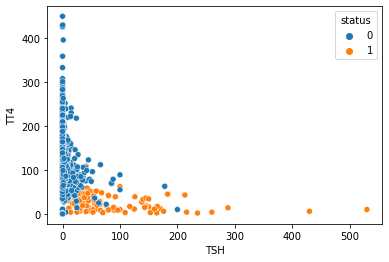

In [47]:
# TSH vs TT4 levels
sns.scatterplot(x='TSH', y='TT4', data=df, hue='status')
plt.show()

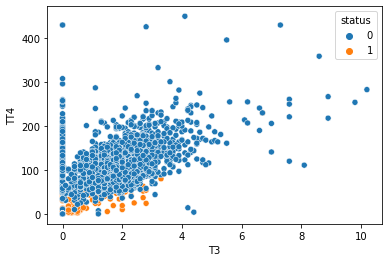

In [48]:
# T3 vs TT4 levels
sns.scatterplot(x='T3', y='TT4', data=df, hue='status')
plt.show()

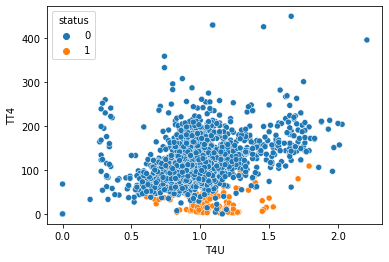

In [49]:
# T4U vs TT4 levels
sns.scatterplot(x='T4U', y='TT4', data=df, hue='status')
plt.show()

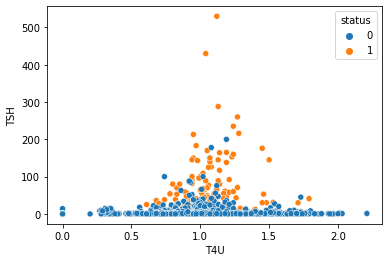

In [50]:
# TSH vs T4U levels
sns.scatterplot(x='T4U', y='TSH', data=df, hue='status')
plt.show()

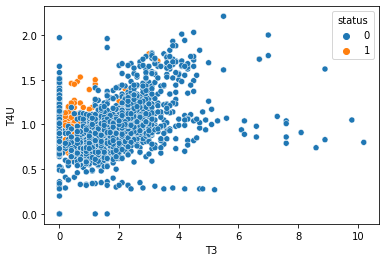

In [51]:
# T3 vs T4U levels
sns.scatterplot(x='T3', y='T4U', data=df, hue='status')
plt.show()

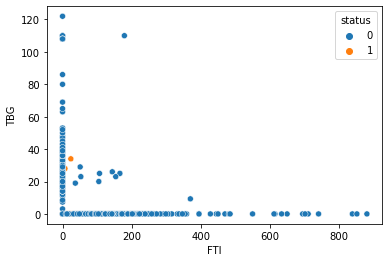

In [52]:
# FTI vs TBG
sns.scatterplot(x='FTI', y='TBG', data=df, hue='status')
plt.show()

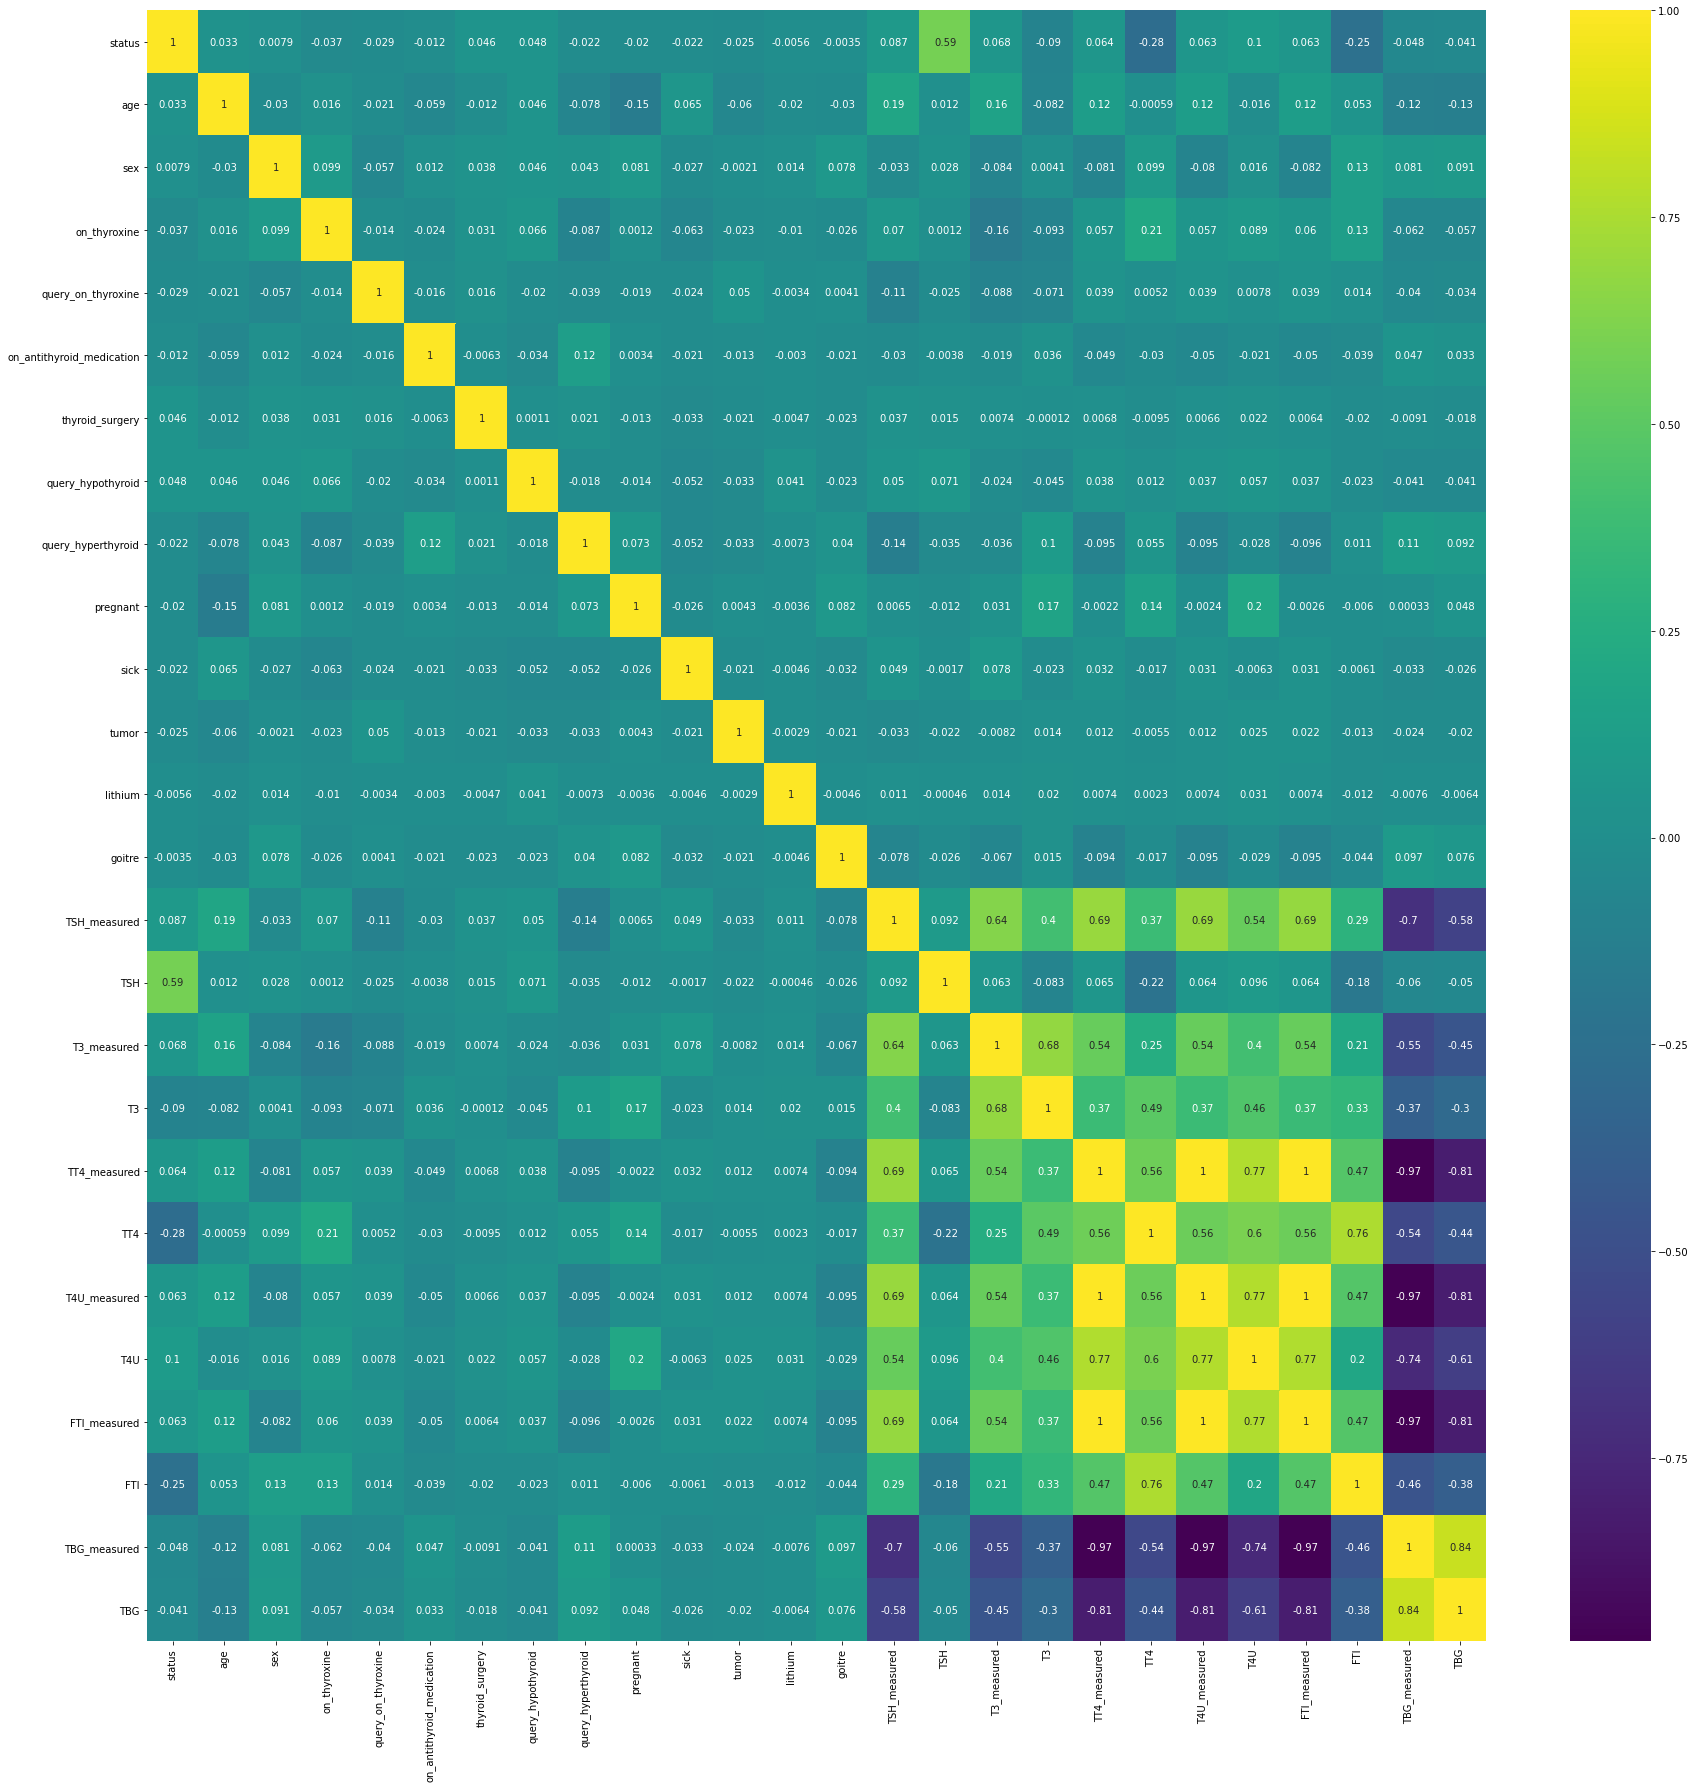

In [53]:
# Heatmap of correlations
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

### Bivariate summaries

- The plots reveal some common indicators in patients diagnosed with hypothyroidism:
1. Patients with T3 levels between 0 and 3.5 often wound up positive
2. TT4 levels between 0 and roughly 80 indicated a positive patient
3. T4U levels between 0.5 and 1.8 indicate hyothyroidism
4. TBG levels between 20 and 30 are also an indicator

- Any combiantion of these levels were a strong tell that the patient would most likely have hypothyroidism.
* There were fewer pregnant women with hypothyroidism than those who weren't.
* Those with and without goitre had nearly identical numbers testing positive for hypothyroidism. It is therefore not a strong indicator.
* Fewer sick people than relatively healthier ones had hypothyroidism.
* Lithium testing false had a higher number of positive cases.

## Part 1: Decision Trees.
<a id="decision_trees" Decision Trees ></a>

### Random Forest Classifier

In [54]:
# Features and Target separation
X = df.drop(['status'], axis=1).values
y=df['status'].values


# Creating a list of features
features = df.columns.to_list()
features.remove('status')

In [55]:
# Training using 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Importing the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_split=20, random_state=20)
forest = forest.fit(X_train, y_train)

In [56]:
# Making predictions

y_pred_forest = forest.predict(X_test)

# Assessing its performance

print("MSE: ", mean_squared_error(y_test, y_pred_forest))
print("MAE: ", mean_absolute_error(y_test, y_pred_forest))
print("Accuracy score: ", forest.score(X_test, y_test))

MSE:  0.008090614886731391
MAE:  0.008090614886731391
Accuracy score:  0.9919093851132686


In [57]:
confusion_matrix(y_test, y_pred_forest)

array([[597,   0],
       [  5,  16]], dtype=int64)

In [58]:
# Getting numerical feature importance
importances = list(forest.feature_importances_)

feature_importances = [(feature, round(importances, 2)) for feature, importances in zip(features, importances)]

# sorting the feature importances

feature_importances = sorted(feature_importances, key=lambda x : x[1], reverse=True)

[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.4
Variable: TT4                  Importance: 0.2
Variable: FTI                  Importance: 0.19
Variable: T4U                  Importance: 0.04
Variable: TSH_measured         Importance: 0.03
Variable: T3                   Importance: 0.03
Variable: TT4_measured         Importance: 0.02
Variable: age                  Importance: 0.01
Variable: T3_measured          Importance: 0.01
Variable: T4U_measured         Importance: 0.01
Variable: FTI_measured         Importance: 0.01
Variable: TBG_measured         Importance: 0.01
Variable: TBG                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0

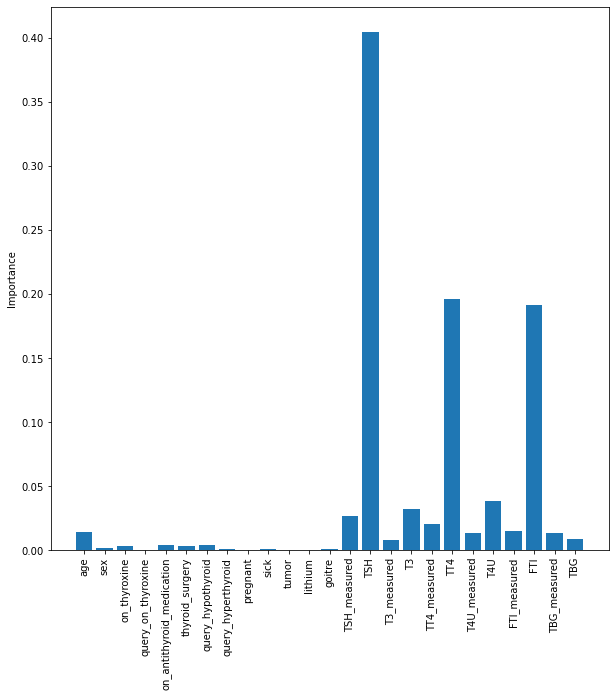

In [59]:
# Displaying this visually
plt.figure(figsize=(10,10))
x_vals = list(range(len(importances)))
plt.bar(x_vals, importances, orientation='vertical')
plt.xticks(ticks=x_vals, labels=features, rotation='vertical')
plt.ylabel('Importance')
plt.show()

**Most important features in making the prediction are**
1. TSH 0.4
2. TT4 0.20
3. FTI 0.19

In [60]:
# Hyper parameter tuning using Grid Search
clf = GridSearchCV(estimator= forest,
                  param_grid={'n_estimators' : [50 ,100, 200, 300, 400],
                              'min_samples_split' : [10,20,30,40,50],
                              'max_depth' : [2, 5, 10]},
                   refit=True,
                   cv=10,
                   scoring='accuracy'
                )

clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=5, min_samples_split=20,
                                              n_estimators=300,
                                              random_state=20),
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='accuracy')

In [61]:
clf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50,
                       random_state=20)

In [62]:
scores = pd.DataFrame(clf.cv_results_)
scores = scores[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
scores.head()

,params,mean_test_score,rank_test_score
50,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.987443,1
54,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.987443,1
51,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.987443,1
52,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.987038,4
53,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.987038,4


In [63]:
# Using tuned forest classifier
forest = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50, random_state=20)
forest = forest.fit(X_train, y_train)

# Scoring using accuracy score
forest.score(X_test, y_test)

0.9919093851132686

_The tuned vs untuned models perform exactly the same_

### Adaboost trees

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=300, random_state=20)

ada = ada.fit(X_train, y_train)

In [65]:
# Making predictions and scoring

y_pred_ada = ada.predict(X_test)

accuracy_ada = ada.score(X_test, y_test)
accuracy_ada

0.9935275080906149

In [66]:
# That's slightly better than Random Forest

In [67]:
# Importances

ada_importances = ada.feature_importances_

ada_f_importances = [(feature, round(ada_importances, 2)) for feature, ada_importances in zip(features, ada_importances)]

ada_f_importances = sorted(ada_f_importances, key=lambda x: x[1], reverse=True)

[print("Variable: {:20} Importance {}".format(*pair)) for pair in ada_f_importances];

Variable: age                  Importance nan
Variable: TSH                  Importance 0.11
Variable: TT4                  Importance nan
Variable: T4U                  Importance 0.1
Variable: T3                   Importance 0.09
Variable: FTI                  Importance 0.09
Variable: query_hypothyroid    Importance 0.02
Variable: thyroid_surgery      Importance 0.01
Variable: sick                 Importance 0.01
Variable: goitre               Importance 0.01
Variable: sex                  Importance 0.0
Variable: on_thyroxine         Importance 0.0
Variable: query_on_thyroxine   Importance 0.0
Variable: on_antithyroid_medication Importance 0.0
Variable: query_hyperthyroid   Importance 0.0
Variable: pregnant             Importance 0.0
Variable: tumor                Importance 0.0
Variable: lithium              Importance 0.0
Variable: TSH_measured         Importance 0.0
Variable: T3_measured          Importance 0.0
Variable: TT4_measured         Importance 0.0
Variable: T4U_measured

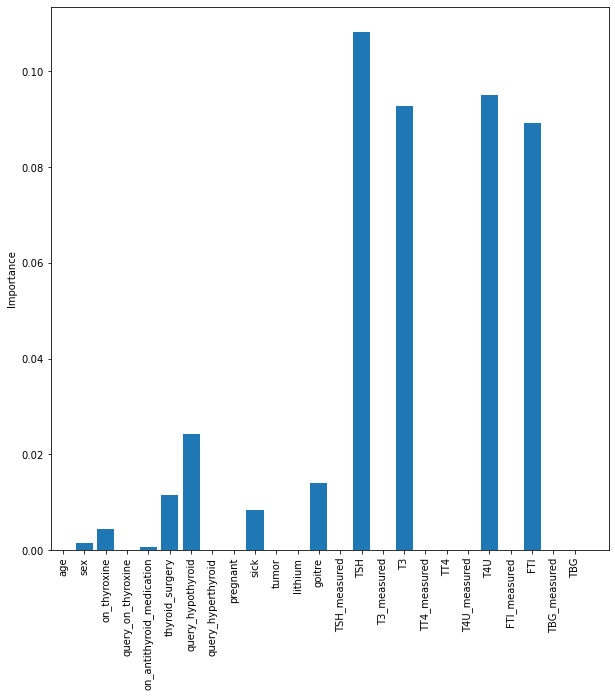

In [68]:
# Displaying this visually
plt.figure(figsize=(10,10))
x_vals = list(range(len(ada_importances)))
plt.bar(x_vals, ada_importances, orientation='vertical')
plt.xticks(ticks=x_vals, labels=features, rotation='vertical')
plt.ylabel('Importance')
plt.show()

_Importances_
* TSH 0.11
* T4U 0.10
* T3 0.09
* FTI 0.09

Out of preference, the RandomForestClassifier would be used to predict and as such the features with the most say would have to
be TSH, TT4 and FTI.

### Part 2: SVM
<a id="svm" SVM ></a>

Point of noting, data cleaning has been done and documented here 

[Data Cleaning](#Data_cleaning)

In [69]:
# IMPORTING SVM
from sklearn.svm import SVC

In [70]:
# Train/Test split 
X = df[['TSH', 'FTI']].values
y = df['status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)

#### Poly classifier

In [71]:
polyclassifier = SVC(kernel='poly', gamma='auto', degree=3)

# Fitting the model
polyclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [72]:
# Visualizations take up too much of the memory and therefore were foregone


In [73]:
# Accuracy of poly svm model
polyclassifier.score(X_test, y_test)

0.9789644012944984

#### Linear SVM

In [74]:
linear = SVC(kernel='linear')

linear.fit(X_train, y_train)

SVC(kernel='linear')

In [75]:
# Scoring the linear model
linear.score(X_test, y_test)

0.9805825242718447

#### RBF SVM

In [76]:
rbf = SVC(kernel='rbf')

rbf.fit(X_train, y_train)

SVC()

In [77]:
# Scoring the model
rbf.score(X_test, y_test)

0.9902912621359223

Despite not having any visuals to see how the classes were separated using each kernel, the scores of each of them are very promising with RBF having the highest even if by a slight margin.

#### Hyperparamter tuning of RBF

In [81]:
clf = GridSearchCV(estimator=rbf,
                  param_grid={'C' : [0,1, 2,3, 4, 5]},
                   cv=5,
                  refit=True)
clf.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Est

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0, 1, 2, 3, 4, 5]})

In [82]:
clf.best_estimator_

SVC(C=2)

In [83]:
clf.best_score_

0.9825722052048518

In [84]:
# Comparing the best estimator score with the cross validated score.
accuracy = cross_val_score(estimator=rbf, X=X_train, y=y_train, cv=10)

In [85]:
accuracy.mean()

0.982168131397913

In [87]:
# As is visble, tuning the hyperparameters does not make much of a significant 
# difference and is therefore not worth the trouble.